In [1]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import hist, processor
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

In [2]:
filename = "/pnfs/psi.ch/cms/trivcat/store/user/mmarcheg/RunIIFall17NanoAODv7/ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8/587E2464-42CA-3A45-BD49-D23E49F658E6.root"
#events = NanoEventsFactory.from_root(filename, schemaclass=NanoAODSchema).events()
events = NanoEventsFactory.from_root(filename, schemaclass=NanoAODSchema, entry_stop=100).events()

In [3]:
events.fields

['event',
 'PuppiMET',
 'SoftActivityJetHT5',
 'CaloMET',
 'run',
 'HLTriggerFirstPath',
 'TrigObj',
 'SoftActivityJetHT',
 'SV',
 'FsrPhoton',
 'RawPuppiMET',
 'Generator',
 'Flag',
 'genWeight',
 'Electron',
 'fixedGridRhoFastjetCentral',
 'SoftActivityJetHT2',
 'FatJet',
 'btagWeight',
 'METFixEE2017',
 'LHEPart',
 'HLT',
 'Photon',
 'SubGenJetAK8',
 'L1PreFiringWeight',
 'ChsMET',
 'HTXS',
 'GenVisTau',
 'luminosityBlock',
 'SoftActivityJetNjets5',
 'genTtbarId',
 'MET',
 'fixedGridRhoFastjetCentralChargedPileUp',
 'CorrT1METJet',
 'fixedGridRhoFastjetCentralCalo',
 'SoftActivityJetNjets2',
 'IsoTrack',
 'SoftActivityJet',
 'SubJet',
 'GenMET',
 'OtherPV',
 'GenJetAK8',
 'Tau',
 'fixedGridRhoFastjetAll',
 'LHE',
 'L1',
 'TkMET',
 'L1simulation',
 'Muon',
 'RawMET',
 'GenDressedLepton',
 'GenJet',
 'LHEReweightingWeight',
 'Jet',
 'PSWeight',
 'SoftActivityJetNjets10',
 'LHEPdfWeight',
 'GenPart',
 'SoftActivityJetHT10',
 'Pileup',
 'LHEWeight',
 'fixedGridRhoFastjetCentralNeutral',

In [4]:
events.Jet.rawFactor

<Array [[0.0635, 0.04, ... 0.336, 0.158]] type='100 * var * float32[parameters={...'>

In [5]:
SF = ak.flatten(1 - events.Jet.rawFactor)
SF

<Array [0.937, 0.96, 0.958, ... 0.664, 0.842] type='1098 * float32'>

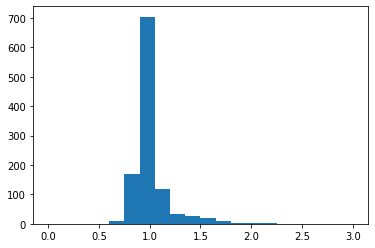

In [6]:
plt.hist(SF, bins=20, range=(0,3));

In [7]:
pt_raw = (1 - events.Jet['rawFactor']) * events.Jet['pt']

In [8]:
ratio = ak.flatten(events.Jet.pt/pt_raw)
ratio

<Array [1.07, 1.04, 1.04, ... 1.21, 1.51, 1.19] type='1098 * float32'>

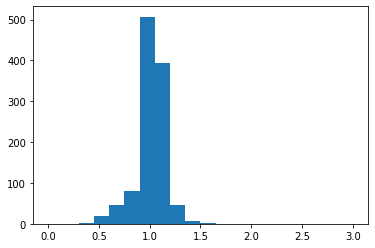

In [9]:
plt.hist(ratio, bins=20, range=(0,3));

(array([  0.,   0.,   0.,   0.,   9., 169., 704., 118.,  34.,  25.,  19.,
          9.,   4.,   4.,   2.,   0.,   1.,   0.,   0.,   0.]),
 array([0.  , 0.15, 0.3 , 0.45, 0.6 , 0.75, 0.9 , 1.05, 1.2 , 1.35, 1.5 ,
        1.65, 1.8 , 1.95, 2.1 , 2.25, 2.4 , 2.55, 2.7 , 2.85, 3.  ],
       dtype=float32),
 <BarContainer object of 20 artists>)

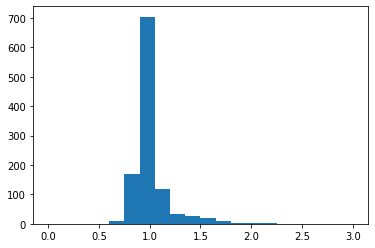

In [10]:
plt.hist(1/ratio, bins=20, range=(0,3))